In [235]:
# This magic will provide an interactive environment
%matplotlib notebook

In [236]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Matplotlib Architecture
There are three layers in matplotlib, from bottom to top, they are:

- **Backend Layer: **Different operating systems are using different backends, which understands how to draw to a canvas.
- **Artist Layer: **Understand how to draw path, ticks, rectangular etc. You typically create a figure, then axes, then access artists from axes and access other things using setters.
- **Scripting Layer: ** The `plt` function, built on artist layer, the way you should interact with the system.

### Backend Layer

In [237]:
mpl.get_backend()

'nbAgg'

### Artist Layer

In [238]:
x = np.arange(0, 3, 0.01)
y = np.exp(x+1)

In [239]:
A = np.random.randn(10000)

<IPython.core.display.Javascript object>


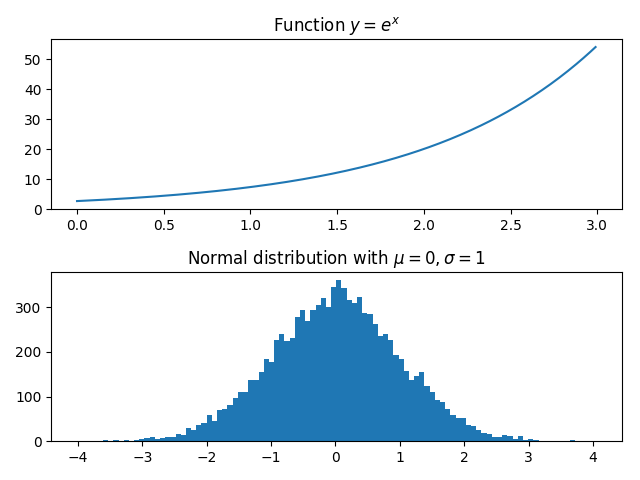

In [240]:
# Create Figure
fig = plt.figure()
# Create Axes
ax1 = fig.add_subplot(211)
# Access lower-level artists from axes
ax1.plot(x, y)
# Set title with artist using setter and getter function
ax1.set_title(r'Function $y = e^{x}$')

ax2 = fig.add_subplot(212)
ax2.hist(A, 100)
ax2.set_title(r'Normal distribution with $\mu=0, \sigma=1$')

# This will adjust the space between subplots
fig.tight_layout()
fig.show()

### Scripting Layer

<IPython.core.display.Javascript object>


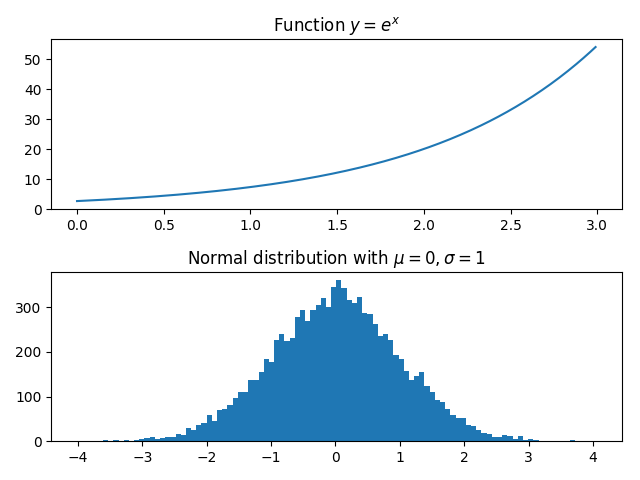

In [241]:
# Create a new figure
plt.figure()
# Specify plots with 2 rows and 1 column, and select the first plot.
plt.subplot(211)
# Draw on the selected plot.
plt.plot(x, y)
# Draw title
plt.title(r'Function $y = e^{x}$')

plt.subplot(212)
plt.hist(A, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')

plt.tight_layout()
plt.show()

**References: **

https://matplotlib.org/users/artists.html

# Scatterplots

In [242]:
x = np.linspace(0,10, 100)
error = np.random.normal(0, 3, 100)
y = 3*x + 1 + error
target = [0]*50 + [1]*50
target = np.array(target)

<IPython.core.display.Javascript object>


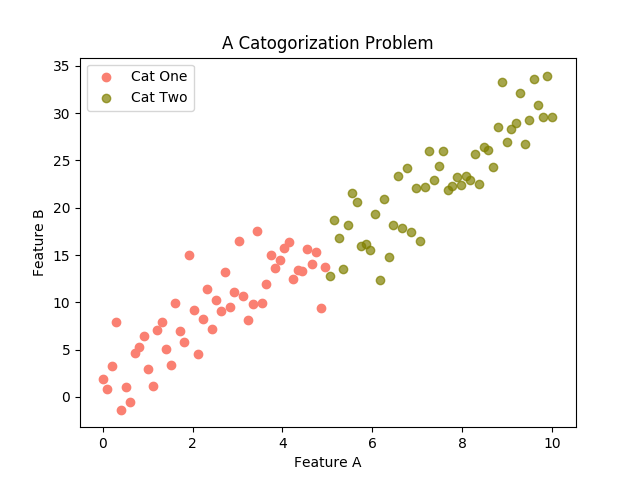

In [243]:
plt.figure()

mask = target == 0
plt.scatter(x[mask], y[mask], color = "salmon")
plt.scatter(x[np.logical_not(mask)], y[np.logical_not(mask)], color = "olive", alpha=.7)

plt.xlabel("Feature A")
plt.ylabel("Feature B")
plt.legend(['Cat One', 'Cat Two'])
plt.title("A Catogorization Problem")

plt.show()

# Line Plots

In [244]:
x = np.arange(9)
y1 = 2*x
y2 = x**2

<IPython.core.display.Javascript object>


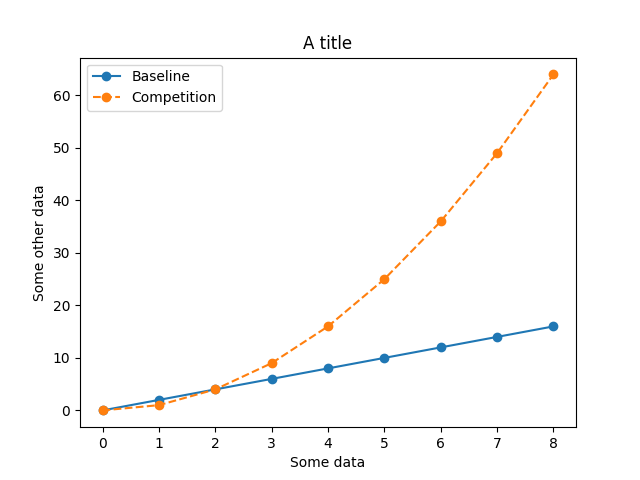

In [245]:
plt.figure()
# plot the linear data and the exponential data
l1 = plt.plot(x, y1, '-o')
l2 = plt.plot(x, y2, '--o')
plt.show()

In [246]:
# Without calling plt.figure, the following code will plot to the figure above
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
plt.legend(['Baseline', 'Competition'])

# Bar Charts

<IPython.core.display.Javascript object>


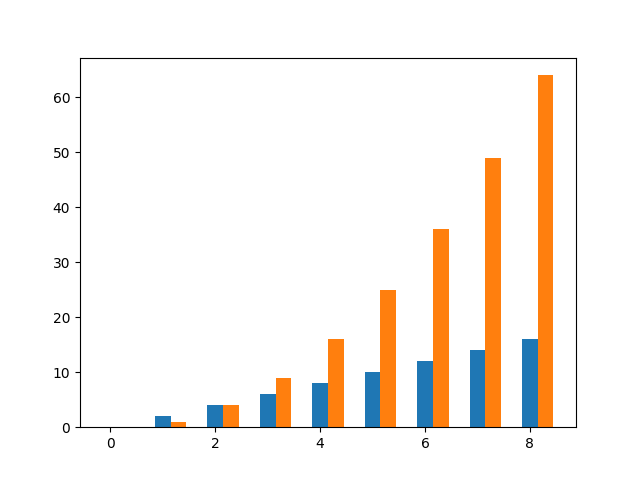

<Container object of 9 artists>

In [247]:
# Parallel dispay bars
plt.figure()
plt.bar(x, y1, width=0.3)
plt.bar(x + 0.3, y2, width=0.3)

<IPython.core.display.Javascript object>


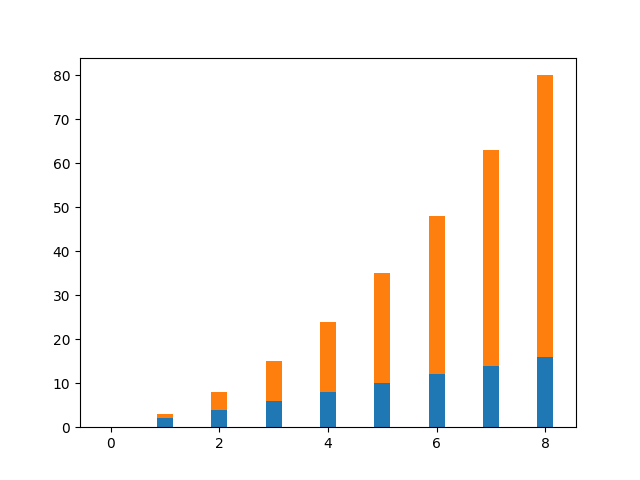

<Container object of 9 artists>

In [248]:
# Stack bars
plt.figure()
plt.bar(x, y1, width = 0.3)
plt.bar(x, y2, width = 0.3, bottom=y1)

# Remove Extra Info

<IPython.core.display.Javascript object>


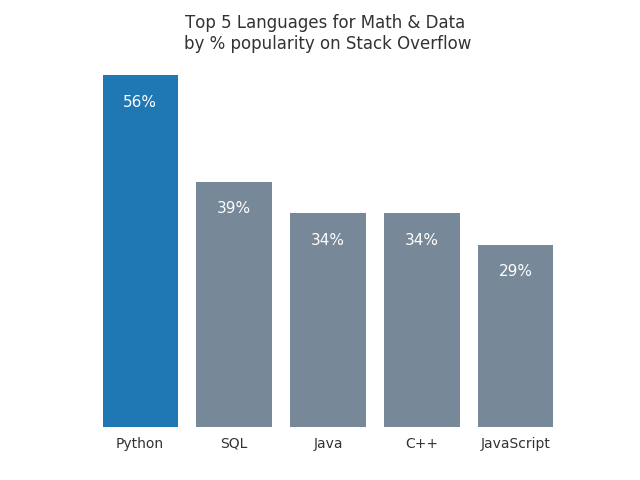

In [250]:
plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)

plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()

# Subplot

In [255]:
A = np.random.normal(loc=0.0, scale=1.0, size=10)
B = np.random.normal(loc=0.0, scale=1.0, size=100)
C = np.random.normal(loc=0.0, scale=1.0, size=1000)
D = np.random.normal(loc=0.0, scale=1.0, size=10000)

<IPython.core.display.Javascript object>


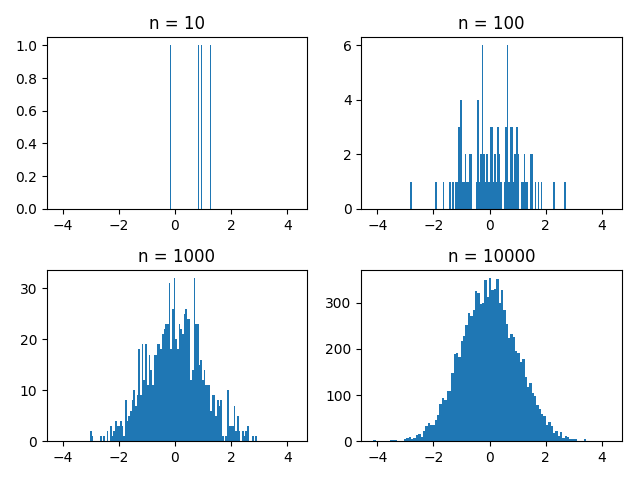

In [271]:
plt.figure()
# Scripting way to add subplot
ax1 = plt.subplot(221)
p1 = plt.hist(A, bins=100)
plt.title("n = 10")
plt.xlim(-4, 4)
# Starting from 2nd plot, it will share x axis with the 1st
plt.subplot(222, sharex=ax1)
plt.hist(B, bins=100)
plt.title("n = 100")
plt.subplot(223, sharex=ax1)
plt.hist(C, bins=100)
plt.title("n = 1000")
plt.subplot(224, sharex=ax1)
plt.hist(D, bins=100)
plt.title("n = 10000")
plt.tight_layout()
plt.show()

# GridSpec

<IPython.core.display.Javascript object>


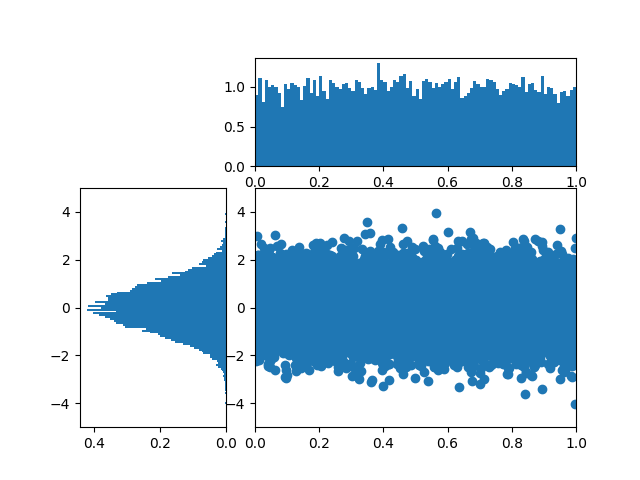

In [272]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [273]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [274]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [275]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

# Heatmap - ToDO

<IPython.core.display.Javascript object>


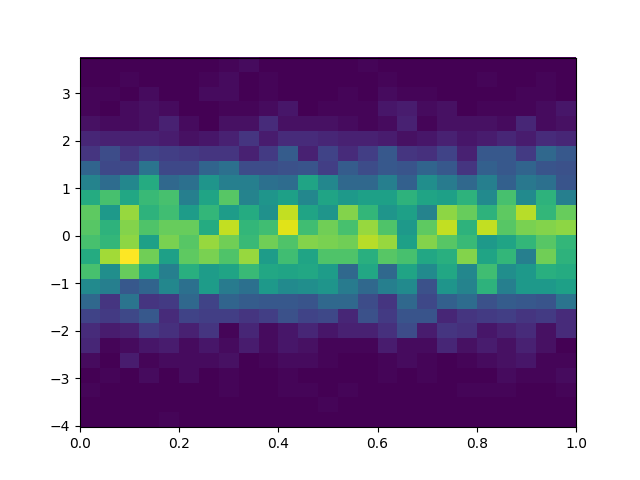

In [276]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


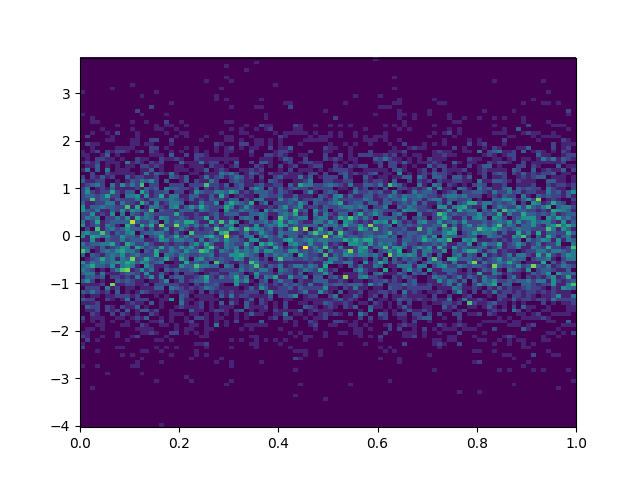

In [277]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

# Box Plot

# Whisker Plots

# Animation

<IPython.core.display.Javascript object>


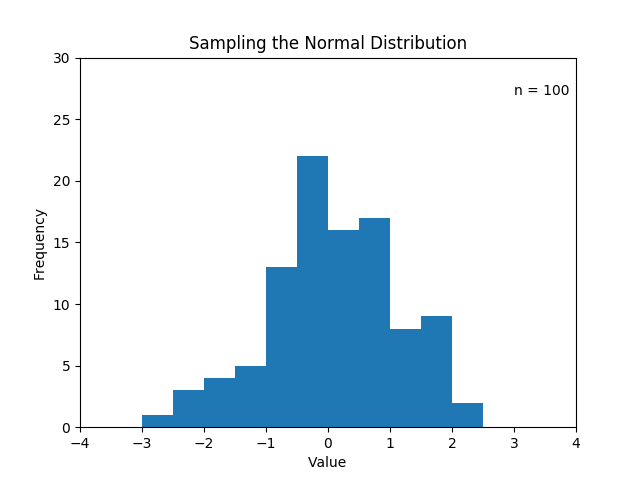

In [279]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])
    
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=1)

References:

https://www.coursera.org/learn/python-plotting/home
